<a href="https://colab.research.google.com/github/bertokawa/dsnp_1_airbnb_tokyo/blob/master/Analysis_Airbnb_Data_from_Tokyo_(Japan).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project 1 in *Data Science na Pratica***
*by Humberto Cavamura ([Github](https://github.com/bertokawa)*)

---

# **Analyzing Data from Airbnb - *Tokyo (JAPAN)***   

<p class="horizontalcenter">
  <img alt="letras-ciudad-tokio" width="40%" src="https://github.com/bertokawa/dsnp_1_airbnb_tokyo/blob/images/images/letras-ciudad-tokio/3225888.jpg?raw=true" style="horizontal-align:middle">
</p>

<div>
  <p class="horizontalcenter">
    <a href="http://www.freepik.com">Designed by Freepik</a>
    </p>
</div>

One of the biggest startups in the world, the [Airbnb](https://www.airbnb.com/) changed the hotel industry with new concepts like share economy and the disruptive innovation. It created a digital platform that connects people who need a place to stay for a few nights and those who have it. So, without owning a single accommodation, Airbnb offers many kinds of places like single rooms, entire apartments for a more reasonable price.

With the massive expansion of the Airbnb, another independent initiative began to growth, is called [Inside Airbnb](http://insideairbnb.com/). It has been offering some data in the internet to people see how Airbnb is present in the cities and how the startup is might affecting the local industry. There is a rivalry between them, Inside Airbnb is questioning the benefits of the Airbnb, but talking about this issue is not the objective of this project.

This project will be dedicated in analyzing data from the Inside Airbnb about Tokyo(Japan) and see the insights it can bring.


## **First steps - Data acquisition**

### **Introduction**

The tool used in here was Python language and the following packages:

In [ ]:
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


To start the analysis, was chosen the file [listings.csv](http://data.insideairbnb.com/japan/kant%C5%8D/tokyo/2020-05-30/visualisations/listings.csv) from the site [Get the Data - Inside Airbnb](http://insideairbnb.com/get-the-data.html). This file was chosen because it is more compact but has enough data to use.

In [ ]:
df = pd.read_csv ("http://data.insideairbnb.com/japan/kant%C5%8D/tokyo/2020-05-30/visualisations/listings.csv")

### **About the file**

Let's show inside the file and how the variables and values are organized.

In [ ]:
print ("{} inputs of data.".format(df.shape[0]))
print ("{} variables.".format(df.shape[1]))

15009 inputs of data.
16 variables.


In [ ]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

It can be a little confusing seen the data as shown as above, but here a little description:

* id - ID number of the place
* name - name given to the place
* host_id - ID number of the host
* host_name - name of the host
* neighbourhood_group - a column without data
* neighbourhood - name of the neighborhood
* latitude - latitude of the place
* longitude - longitude of the place
* room_type - type of the place
* price - price to rent
* minimum_nights - minimum nights to stay
* number_of_reviews - the number of reviews received
* last_review - when was the last review
* reviews_per_month - mean of the review per month
* calculated_host_listings_count - how many places the host has
* availability_365 - how many days the place is available in 365 days

### **Example of the table**

The first five inputs from the file, to see if the table needs some adjusting.

In [ ]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,35303,"La Casa Gaienmae C Harajuku, Omotesando is nearby",151977,Miyuki,NaN,Shibuya Ku,35.67152,139.71203,Private room,4192,28,18,2018-07-28,0.18,3,89
1,197677,Oshiage Holiday Apartment,964081,Yoshimi & Marek,NaN,Sumida Ku,35.71721,139.82596,Entire home/apt,10965,3,165,2020-03-04,1.56,1,270
2,289597,Private apt in central Tokyo #203,341577,Hide&Kei,NaN,Nerima Ku,35.74267,139.65810,Entire home/apt,4192,28,113,2020-02-17,1.17,2,242
3,370759,"Cozy flat #203, local area YET 10 mins to shib...",1573631,"Gilles,Mayumi,Taiki",NaN,Setagaya Ku,35.66443,139.65707,Entire home/apt,6987,28,103,2020-04-16,1.37,3,364
4,700253,Private apt in central Tokyo #201,341577,Hide&Kei,NaN,Nerima Ku,35.74264,139.65832,Entire home/apt,3977,28,104,2020-05-12,1.12,2,353


### **Adjusting the table**

An important fact observed in this database was the price. It's using Japanese currency, JPY (Japan Yen), but for easier analysis is necessary to convert to USD (US Dollars).

This exchange currency was on June 27 2020.

$$
1 (USD) = 107.211 (JPY)
$$



In [ ]:
df_backup = df.copy()
df['price'] = df['price'] / 107.211

Next step is checking in the table for NULL values:

In [ ]:
df.isnull().sum().sort_values (ascending = False) / df.shape[0] * 100

neighbourhood_group               100.000000
reviews_per_month                  17.609434
last_review                        17.609434
host_name                           0.046639
availability_365                    0.000000
calculated_host_listings_count      0.000000
number_of_reviews                   0.000000
minimum_nights                      0.000000
price                               0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood                       0.000000
host_id                             0.000000
name                                0.000000
id                                  0.000000
dtype: float64

As shown above, the variable *neighbourhood_column* has all input as Null, so this it will be dropped from the table.

Also *review_per_month* and *last_review* and *host_name* have a few nulls too, but it won't be deal at this time.


In [ ]:
df.drop ('neighbourhood_group', axis = 1, inplace = True)

## **Next step - Analyzing raw data**


This step is for checking the data and bringing some information.

### **Starting analyzing**

Using some statistical operations will help to find some insights.

In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.500900e+04,1.500900e+04,15009.000000,15009.000000,15009.000000,15009.000000,15009.000000,12366.000000,15009.000000,15009.000000
mean,3.171782e+07,1.704263e+08,35.694697,139.734775,254.003366,3.418149,26.529482,1.565028,13.563262,151.573789
std,9.436473e+06,1.005129e+08,0.143989,0.081667,734.921764,9.251353,40.767312,1.297347,16.145016,119.080421
min,3.530300e+04,1.519770e+05,27.072330,139.123190,0.000000,1.000000,0.000000,0.020000,1.000000,0.000000
25%,2.651004e+07,7.061679e+07,35.685800,139.699340,65.170552,1.000000,2.000000,0.600000,3.000000,55.000000
50%,3.344028e+07,1.857782e+08,35.702810,139.728020,111.294550,1.000000,11.000000,1.360000,8.000000,145.000000
75%,3.967955e+07,2.529105e+08,35.724600,139.784810,186.501385,2.000000,34.000000,2.240000,18.000000,246.000000
max,4.357856e+07,3.469412e+08,35.832430,142.202880,9944.259451,365.000000,529.000000,40.080000,95.000000,365.000000


In a first impression, some variables are showing a strange behavior:

* *price* - the maximum value is a way higher than the mean, almost four times. Also 75% of the data is too lower than the maximum. So maybe there are few places having exorbitant values compared to others and interfering in the analysis.

* *minimum_nights* - this variable has a problem similar from the *price*. There is a rent place for a minimum_nights equals a year, it's is very strange since the Airbnb is used more to rent for a few days like a weekend.

* *latitude* - there is a difference about 8º latitude in the minimum value and the mean. This difference is more than 850km in real world, this is almost the distance from Tokyo (Japan) to Hiroshima (Japan).

* *longitude* - there is a difference about 3º longitude, it can be almost 300km extension.

These points with strange values are called *outliers*. It can be some exceptions or even a error.

### **Deeper analysis on each variable listed above**

Let's start visualize the data distribution with histograms.

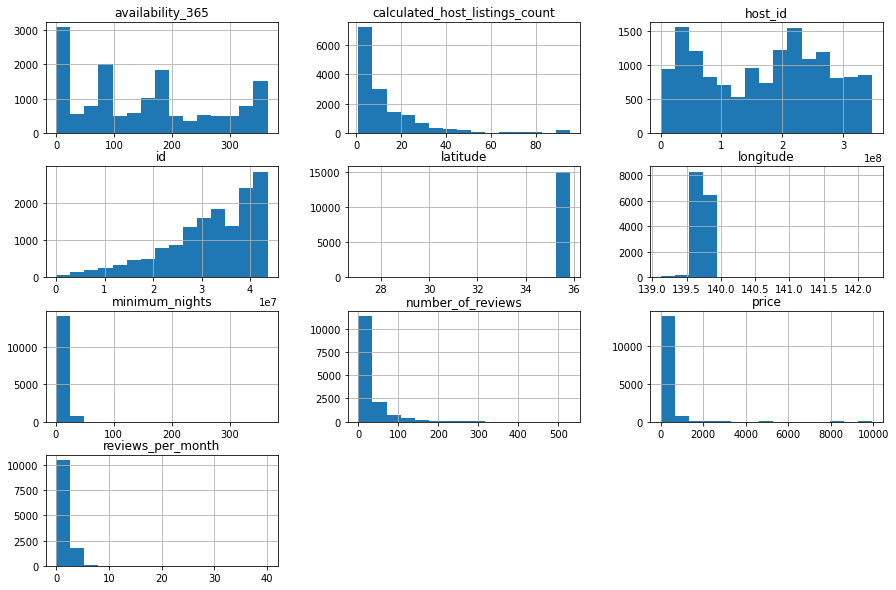

In [ ]:
df.hist (bins = 15, figsize = (15,10));

As said before, some variables are showing some inconsistence. 
* *price* - a large concentration of numbers below USD 1000,00, almost zero above this value.
* *minimum_nights* - high concentration with few days. Above this day appearing to be almost zero.
* *latitude* - a concentration of coordinates in 35º lat, but it shows a few below at 28º lat.

#### **Let's begin with *PRICE***


Let's visualize these outliers, with a graphic called Boxplot.

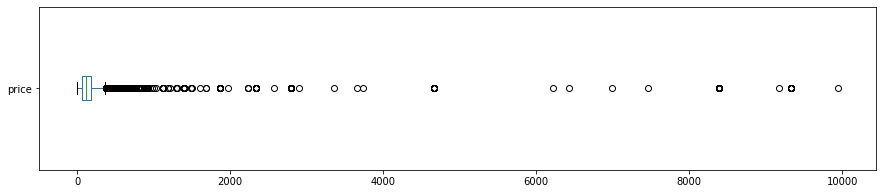

price: value over than 270:
2692 inputs
17.935905%


In [ ]:
df.price.plot (kind = 'box', vert = False, figsize = (15,3))
plt.show()

print ("price: value over than 270:")
print ("{} inputs".format(len(df[df.price > 270])))
print ("{:4%}".format((len(df[df.price > 270])/df.shape[0])))

The dots are the outliers. They are going to be removed from the table for easier analysis.

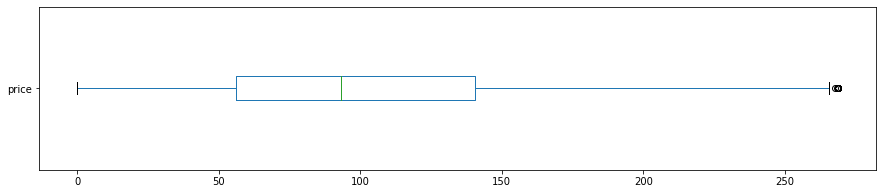

In [ ]:
df_price = df.copy()

df_price.drop (df_price[df_price.price > 270].index, axis = 0, inplace = True)

df_price.price.plot (kind = 'box', vert = False, figsize = (15,3))
plt.show()

df_v2 = df_price.copy()

Using *USD 270,00*, get easier to see that most place to rent is  between USD 50,00 to USD 150,00.

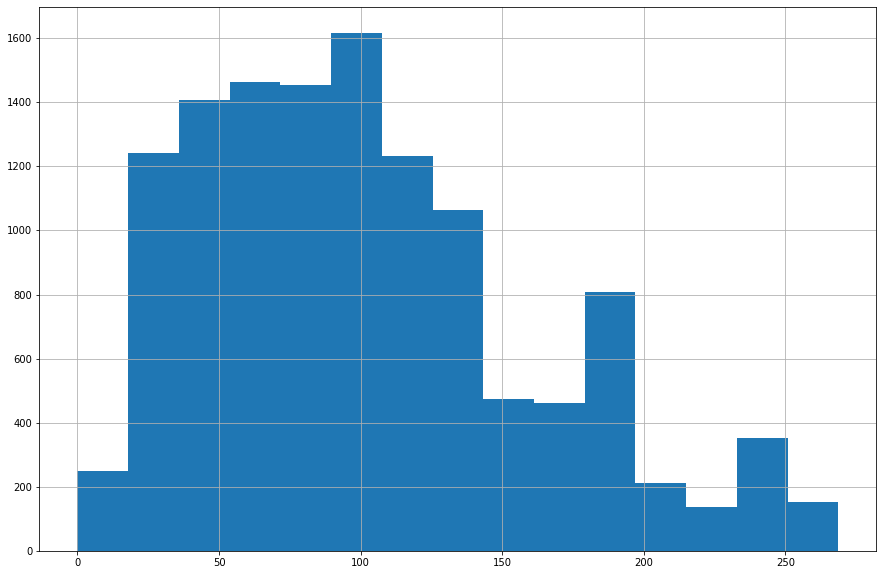

In [ ]:
df_price.price.hist (bins = 15, figsize = (15,10));

Using histograms again to price, the main value is almost similar from the boxplot.

In [ ]:
df_price [['price']].describe()

,price
count,12317.000000
mean,101.215849
std,58.228243
min,0.000000
25%,56.150955
50%,93.246029
75%,140.377387
max,268.722426


After the removing the outliers, the statistical values make more sense. Price have a high concentration between USD 50,00 to USD 150,00. These values is more affordable than the one in the outliers.

#### **Second variable is *MINIMUM_NIGHTS***

Again starting with a boxplot:

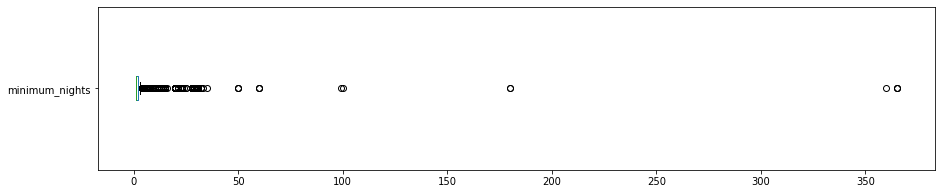

Value above than 4:
1364 inputs
9.087881%


In [ ]:
df_nights = df.copy()
df_nights.minimum_nights.plot (kind = 'box', vert = False, figsize = (15,3))
plt.show()

print ("Value above than 4:")
print ("{} inputs".format(len(df_nights[df_nights.minimum_nights > 4])))
print ("{:4%}".format((len(df_nights[df_nights.minimum_nights > 4])/df_nights.shape[0])))

Again there are outliers above, but so many, less than 10% when value is above 4 days.

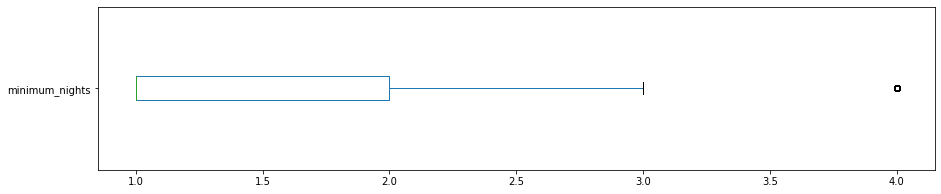

In [ ]:
df_nights.drop (df_nights[df_nights.minimum_nights > 4].index, axis = 0, inplace = True)
df_v2.drop (df_nights[df_nights.minimum_nights > 4].index, axis = 0, inplace = True)
df_nights.minimum_nights.plot (kind = 'box', vert = False, figsize = (15,3))
plt.show()

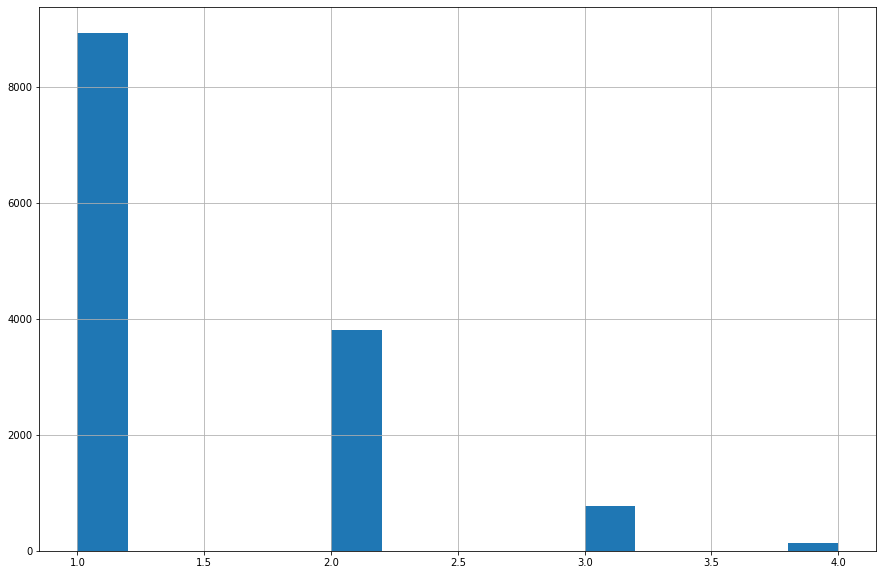

In [ ]:
df_nights.minimum_nights.hist(bins=15, figsize = (15,10));

The boxplot without many outliers.

In [ ]:
df_nights [['minimum_nights']].describe()

,minimum_nights
count,13645.000000
mean,1.421107
std,0.643070
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,4.000000


So the data shows that most of the hosts prefer to offer at least 1 night. Sometimes, hosts choose two day at minimum, to ensure a weekend per example

However, using one day, the hosts appear not to care renting for many days, maybe a reason can be because that Tokyo is still a more business city than touristic and some the visitors can be workers in travel.

#### **Coordinates - Latitude & Longitude**

Search for outliers in coordinates, a few differences in this variable can make a huge change in position in the world.

Using the coordinates to plot a scatter map will help to see how spread the points are.

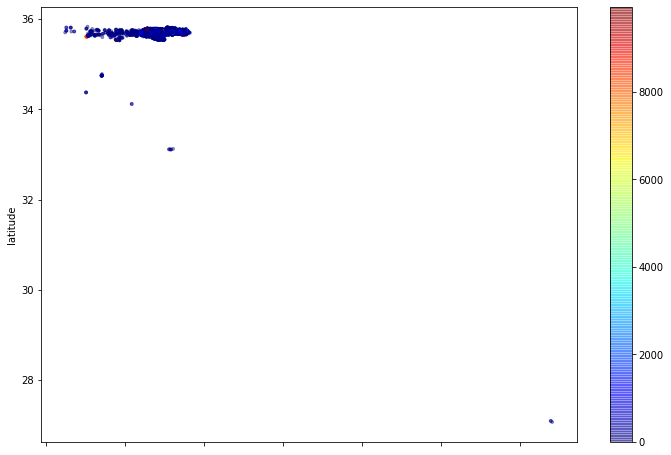

In [ ]:
df.plot (
    kind='scatter', 
    x = 'longitude', 
    y = 'latitude', 
    alpha = 0.4,
    c = df['price'],
    s = 8,
    cmap = plt.get_cmap ('jet'),
    figsize = (12, 8)
    );

There are some points very far from the concentration on top-left, so choosing latitude 35º and longitude 140º as a limit to remove the points far away.

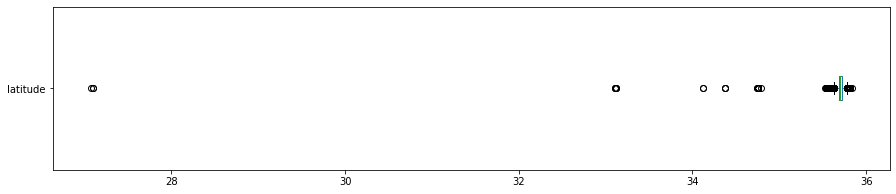

latitude: value under than 35:
29 inputs
0.193217%


In [ ]:
df.latitude.plot (kind = 'box', vert = False, figsize = (15,3))
plt.show()

print ("latitude: value under than 35:")
print ("{} inputs".format(len(df[df.latitude < 35])))
print ("{:4%}".format((len(df[df.latitude < 35])/df.shape[0])))

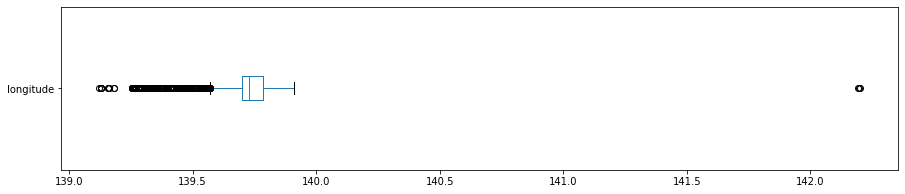

longitude: value over than 140:
3 inputs
0.019988%


In [ ]:
df.longitude.plot (kind = 'box', vert = False, figsize = (15,3))
plt.show()

print ("longitude: value over than 140:")
print ("{} inputs".format(len(df[df.longitude > 140])))
print ("{:4%}".format((len(df[df.longitude > 140])/df.shape[0])))

In the boxplots above, there a few values very far from the others. These will be removed at first.

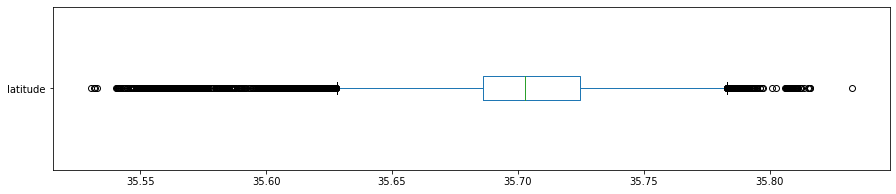

In [ ]:
df_coord = df.copy()

df_coord.drop (df_coord[df_coord.latitude < 35].index, axis = 0, inplace = True)

df_v2.drop (df_v2[df_v2.latitude < 35].index, axis = 0, inplace = True)

df_coord.latitude.plot (kind = 'box', vert = False, figsize = (15,3))
plt.show()

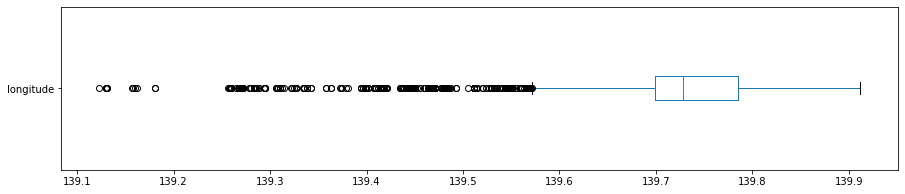

In [ ]:
df_coord.drop (df_coord[df_coord.longitude > 140].index, axis = 0, inplace = True)

df_v2.drop (df_v2[df_v2.longitude > 140].index, axis = 0, inplace = True)

df_coord.longitude.plot (kind = 'box', vert = False, figsize = (15,3))
plt.show()

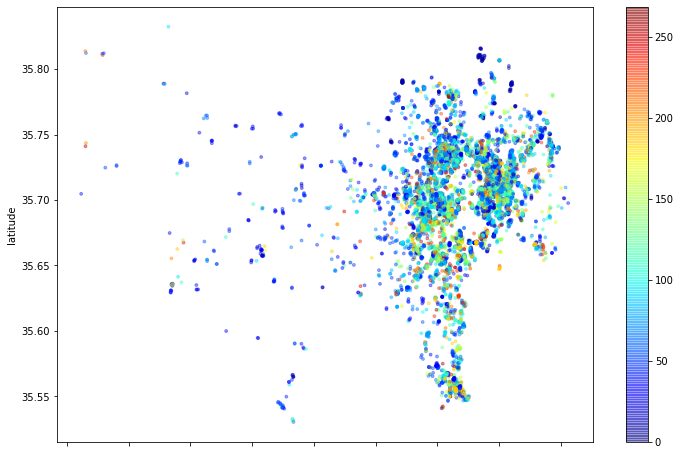

In [ ]:
df_v2.plot (
    kind='scatter', 
    x = 'longitude', 
    y = 'latitude', 
    alpha = 0.4,
    c = df_v2['price'],
    s = 8,
    cmap = plt.get_cmap ('jet'),
    figsize = (12, 8)
    );

After removing those points, the scatter plot resemble to Tokyo city.

To complete this section, is needed to do a deep search in the database the about the outliers coordinates.

In [ ]:
long = df[df['longitude'] > 140].neighbourhood.value_counts()
print (long)

Ogasawara Mura    3
Name: neighbourhood, dtype: int64


In [ ]:
lat = df[df['latitude'] < 35].neighbourhood.value_counts()
print (lat)

Oshima Machi      15
Hachijo Machi      6
Ogasawara Mura     3
Niijima Mura       3
Miyake Mura        2
Name: neighbourhood, dtype: int64


In [ ]:
df.drop (df[df.latitude > 35].index, axis = 0, inplace = True)
df.groupby("neighbourhood")['price'].mean()

neighbourhood
Hachijo Machi      93.415477
Miyake Mura       139.873707
Niijima Mura       93.246029
Ogasawara Mura     71.858298
Oshima Machi       77.740779
Name: price, dtype: float64

After searching through the internet, Tokyo has some islands. Different from the capital, they are an escape to a more natural place. Each of them has its own beauty.

* Oshima - approximately 100km from the capital. There is an active vulcan that dominated the landscape and the flora of the island.
* To-shima - about 150 km from the capital. An island with crystal water where people can do scuba diving and see the water fauna.
* Niijima - approx. 163 km far. Beautiful beach with white sand, big waves, ideal for surfers
* Kouzushima - 190 km far. In center of the island, Mt. Tenjo has 574m tall where people go for hiking. Another attraction is Akasaki Promenade is a wood walking path through a rock cliff near the ocean.
* Miyake - 190 km far too. This island once had sulfuric gases flown through the earth in the past, so carrying a gas mask are a must in case of an emergency. In this island there are approximately 250 birds' species, also called the Bird Island, the people can do bird watching tourism.
* Mikurajima - distance about 200m. It's famous because the tourists can swim with dolphins.
* Hachijo - approximately 290 km from Tokyo. An island formed by two inactive vulcans about 650m and 850m tall. Hiking is a favorite activity in the island
* Aogashima - almost 370 km. This island have a very difficult access because of the geological structure, the entire island is a crater of an inactive vulcan. It's famous for stargazing.
* Ogasawara - distance about 1000 km from Tokyo, it's an archipelago formed about 30 islands and it received the UNESCO's World Natural Heritage. Far from the main land and having unique fauna and flora, many places are protected and off-trail hiking and campaign are not allowed. It's the most stunning islands to visit, with beautiful beaches, many coral reefs, untamed nature and wildlife.

<p align="center">
<img alt="edge" width="40%" src="https://github.com/bertokawa/dsnp_1_airbnb_tokyo/blob/images/images/hayato-shin-zcKuJ3YJFmw-unsplash.jpg?raw=true">
</p>

<p align="center">
<span>Kozushima - Photo by <a href="https://unsplash.com/@hytshin?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Hayato Shin</a> on <a href="/s/photos/tokyo-islands?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Unsplash</a></span>
</p>

### **Correlation**

Next step is the *Correlation*, this means if there are dependencies between them and how each of them is related. In Seaborn package is possible to visualize the correlation.

In [ ]:
corr = df_v2 [[
              'price',
              'minimum_nights',
              'number_of_reviews',
              'reviews_per_month',
              'latitude',
              'longitude',
              'calculated_host_listings_count',
              'availability_365'
              ]].corr()

display (corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,latitude,longitude,calculated_host_listings_count,availability_365
price,1.000000,-0.078388,-0.024652,0.070761,-0.092424,0.063150,-0.126827,0.026504
minimum_nights,-0.078388,1.000000,-0.031986,-0.111499,0.014975,-0.035897,0.135189,0.035874
number_of_reviews,-0.024652,-0.031986,1.000000,0.717656,-0.054774,-0.047962,-0.157988,0.045509
reviews_per_month,0.070761,-0.111499,0.717656,1.000000,-0.064619,-0.006896,-0.147624,0.039937
latitude,-0.092424,0.014975,-0.054774,-0.064619,1.000000,0.195377,0.108547,-0.011245
longitude,0.063150,-0.035897,-0.047962,-0.006896,0.195377,1.000000,0.048879,0.001386
calculated_host_listings_count,-0.126827,0.135189,-0.157988,-0.147624,0.108547,0.048879,1.000000,0.001827
availability_365,0.026504,0.035874,0.045509,0.039937,-0.011245,0.001386,0.001827,1.000000


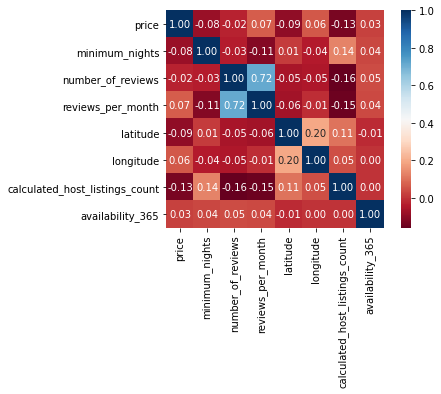

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap (corr, cmap = 'RdBu', fmt = '.2f', square = True, linecolor = 'white', annot = True);

The heatmap shows that almost all variables don't have any correlation, showing values near zero. With exception the *number_of_reviews* and *reviews_per_month*, one is consequence from the other.

### **Place to stay**

#### **Type of the room**

The hosts in the Airbnb can offer many kinds of places, like an individual room, shared room, entire house or apartment.

So the distribution in Tokyo is:

Entire home/apt    7952
Private room       3089
Shared room         668
Hotel room          579
Name: room_type, dtype: int64


Entire home/apt    64.713542
Private room       25.138346
Shared room         5.436198
Hotel room          4.711914
Name: room_type, dtype: float64




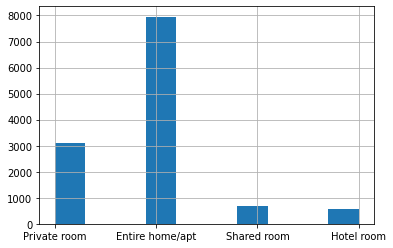

In [ ]:
type_place = df_v2['room_type'].value_counts()
print (type_place)
print("\n")

type_place_p = type_place / df_v2.shape[0] * 100
print (type_place_p)
print("\n")

df_v2.room_type.hist();

Airbnb offers more private places for the users, 7952 entire places and 3089 private rooms, all of this type of accommodation is almost 90%.

#### **And the neighborhood**



Checking the data from neighborhood variable for some conclusions.

First, price:

In [ ]:
df_v2.groupby(['neighbourhood']).price.mean().sort_values(ascending = False) [:5]

neighbourhood
Hinohara Mura    137.404278
Shibuya Ku       120.717582
Okutama Machi    119.948513
Minato Ku        117.670562
Mitaka Shi       112.700500
Name: price, dtype: float64

Sees how many accommodations is in each neighborhoods above

In [ ]:
print ("Hinohara Mura:{}".format(df_v2[df_v2.neighbourhood == 'Hinohara Mura'].shape[0]))
print ("Shibuya Ku:{}".format(df_v2[df_v2.neighbourhood == 'Shibuya Ku'].shape[0]))
print ("Okutama Machi:{}".format(df_v2[df_v2.neighbourhood == 'Okutama Machi'].shape[0]))
print ("Minato Ku:{}".format(df_v2[df_v2.neighbourhood == 'Minato Ku'].shape[0]))
print ("Mitaka Shi:{}".format(df_v2[df_v2.neighbourhood == 'Mitaka Shi'].shape[0]))

Hinohara Mura:4
Shibuya Ku:847
Okutama Machi:5
Minato Ku:458
Mitaka Shi:15


Three neighborhoods, *Hinohara Mura*, *Okutama Machi*, *Mitaka Shi*, appear with high prices but they have low number of places. So, it's not possible to be sure how expensive they are.

So among the results, *Shibuya Ku* and *Minato Ku* require some attention

To complete the information, is needed to see the numbers of the places are spread through the neighborhood.

In [ ]:
df_v2.neighbourhood.value_counts().sort_values(ascending = False)[:5]

Shinjuku Ku    2242
Taito Ku       1583
Toshima Ku     1347
Sumida Ku      1064
Shibuya Ku      847
Name: neighbourhood, dtype: int64

In here, let's see the two first with high number of accommodations: *Shinjuku Ku* and *Taito Ku*.

Little descriptions of theses four neighborhoods:
* Shibuya Ku: is one of the most modern places in Tokyo with the establishments such as shopping malls and bars aimed for the young. One of the most famous spots is the Shibuya Crossing, the largest intersection in the world.

<p align="center">
  <img alt="shibuya" width="45%" src="https://github.com/bertokawa/dsnp_1_airbnb_tokyo/blob/images/images/edward-ma-1bBRjHcMZNY-unsplash.jpg?raw=true" style="horizontal-align:middle">
</p>

<p align="center">
  <span>Photo by <a href="https://unsplash.com/@makcedward?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Edward Ma</a> on <a href="/s/photos/shibuya?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Unsplash</a></span>
</p>

* Shinjuku Ku: another modern part of the capital, but aimed for public in general. With some skyscrapers, electronics stores, bars. One of the main attractions is Tokyo Metropolitan Government Office, a skyscraper with an observatory at 200 meters tall.

<p align="center">
  <img alt="Shinjuku" width="45%" src="https://github.com/bertokawa/dsnp_1_airbnb_tokyo/blob/images/images/gilly-_EBOeN3XBOM-unsplash.jpg?raw=true"/>
</p>

<p align="center">
  <span>View from the observatory - Photo by <a href="https://unsplash.com/@gillyberlin?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Gilly</a> on <a href="/s/photos/tokyo-metropolitan-government?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Unsplash</a></span>
</p>

* Minato Ku: is one of the most international areas. Many companies established headquarters there, so it's a neighborhood structured for foreigners. The Tokyo Tower is a famous there, an antenna based on Eiffel Tower, used for telecommunication and on its base there a museum and a restaurant for tourists.

<p align="center">
  <img alt="tokyo_tower" width="45%" src="https://github.com/bertokawa/dsnp_1_airbnb_tokyo/blob/images/images/yu-kato-bBhkqp_qCck-unsplash.jpg?raw=true"/>
</p>

<p align="center">
  <span>Photo by <a href="https://unsplash.com/@yukato?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Yu Kato</a> on <a href="/s/photos/tokyo-tower?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Unsplash</a></span>
</p>

* Taito Ku: is more known for the Japanese culture, with old shrines and temples, Japanese traditional food. Ueno Park is famous for the Tokyo National Museum and is one of the places where tourists can see the cherry blossoms.

<p align="center">
  <img alt="ueno_park" width="45%" src="https://github.com/bertokawa/dsnp_1_airbnb_tokyo/blob/images/images/dlkr-life-NKqBP5dJ8uY-unsplash.jpg?raw=true"/>
</p>

<p align="center">
  <span>Photo by <a href="https://unsplash.com/@dlkrlife?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">DLKR Life</a> on <a href="/s/photos/ueno-park?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Unsplash</a></span>
</p>

In [ ]:
df_v2.groupby(['neighbourhood']).number_of_reviews.sum().sort_values(ascending=False)[:10]

neighbourhood
Shinjuku Ku    61127
Taito Ku       37907
Toshima Ku     33739
Shibuya Ku     32613
Sumida Ku      27765
Minato Ku      13988
Suginami Ku    12985
Nakano Ku      12904
Setagaya Ku    12415
Chuo Ku        11347
Name: number_of_reviews, dtype: int64

All these selected neighborhoods have its own type of attraction and using the *number_of_reviews* is possible to see that many people stayed in these places, reinforcing that are good options to choose.

## Conclusions

With the end of the project, it is possible to see that Tokyo is a capital with different life styles and activities. It have a modern part with skyscrapers, all kind of malls, bars. Also, you can see the traditional and ancient culture of Japan, food, temples and shrines.

Even if you want to escape the routine of the city, it is possible to visit a  natural side, such as the islands of Tokyo. Each one offers unique and different attractions, like swimming with dolphins, beaches with crystal waters, hiking through forests and mountains, even stargazing.

Normally Airbnb offers more entire places to stay than only rooms for a price in a range of USD 50,00 to USD 150,00. Also, the tourists can stay a night in one place and then change to another neighborhood on the other day, because many places offers one night minimum, allowing the tourist to visit many parts of the city.

Tokyo is an interesting destination, with many options of entertainment and sightseeing a through a modern, traditional or natural choices.